(Source: http://www.scipy-lectures.org/packages/scikit-learn/index.html#introduction-problem-settings)

In [1]:
%matplotlib notebook

## Classification

<IPython.core.display.Javascript object>


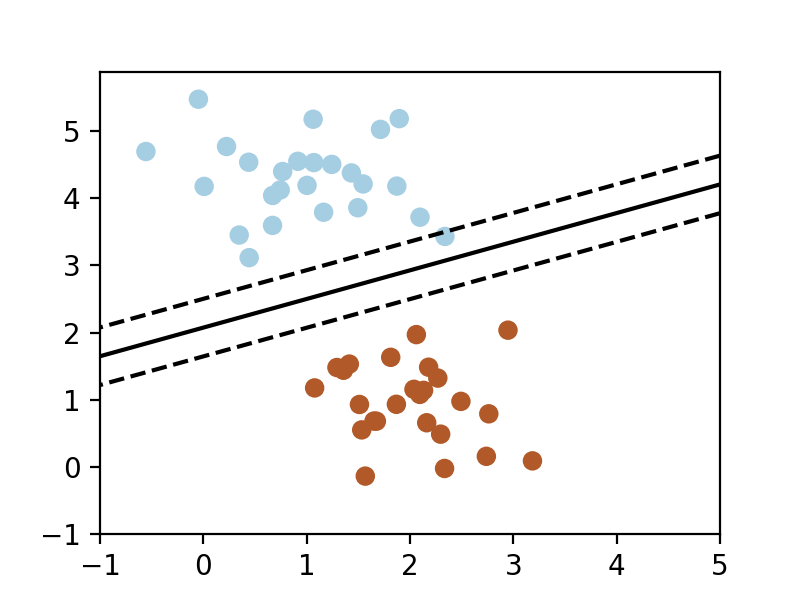

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs


# we create 50 separable synthetic points
X, Y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01,
                    max_iter=200, tol=1e-4, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
           linestyles=['dashed', 'solid', 'dashed'])
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.axis('tight')


plt.show()

We’ll take a look at two very simple machine learning tasks here. The first is a classification task: the figure shows a collection of two-dimensional data, colored according to two different class labels. A classification algorithm may be used to draw a dividing boundary between the two clusters of points:

By drawing this separating line, we have learned a model which can generalize to new data: if you were to drop another point onto the plane which is unlabeled, this algorithm could now predict whether it’s a blue or a red point.

## Regression

/Users/greg/code/gkiar/sklearn-tutorials/env/sklearn/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


<IPython.core.display.Javascript object>


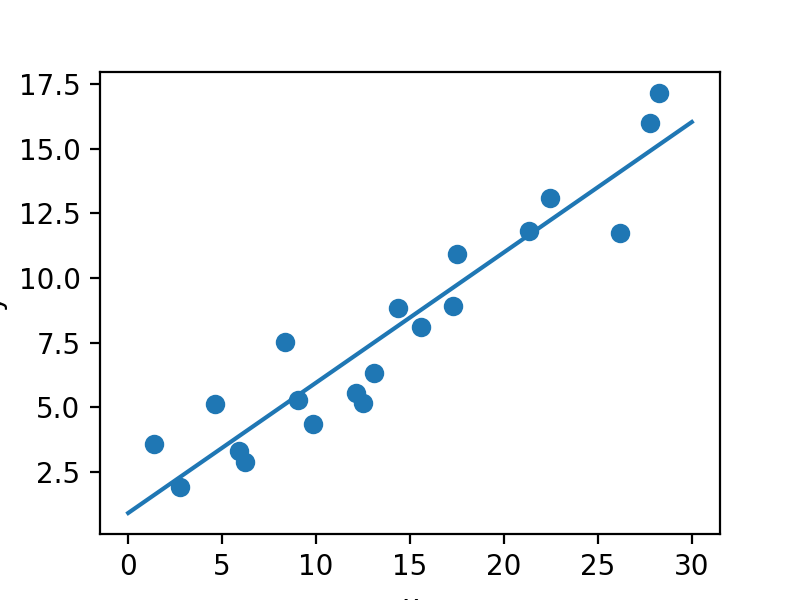

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

The next simple task we’ll look at is a regression task: a simple best-fit line to a set of data.

Again, this is an example of fitting a model to data, but our focus here is that the model can make generalizations about new data. The model has been learned from the training data, and can be used to predict the result of test data: here, we might be given an x-value, and the model would allow us to predict the y value.

## Dataset Organization


Machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]

 - n_samples: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
 - n_features: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays.

Quick Q: http://www.scipy-lectures.org/packages/scikit-learn/index.html#the-application-problem

## Loading Datasets

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
print(iris.data.shape)

(150, 4)


In [6]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)

150
4


In [7]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [8]:
print(iris.target.shape)

(150,)


In [9]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


<IPython.core.display.Javascript object>


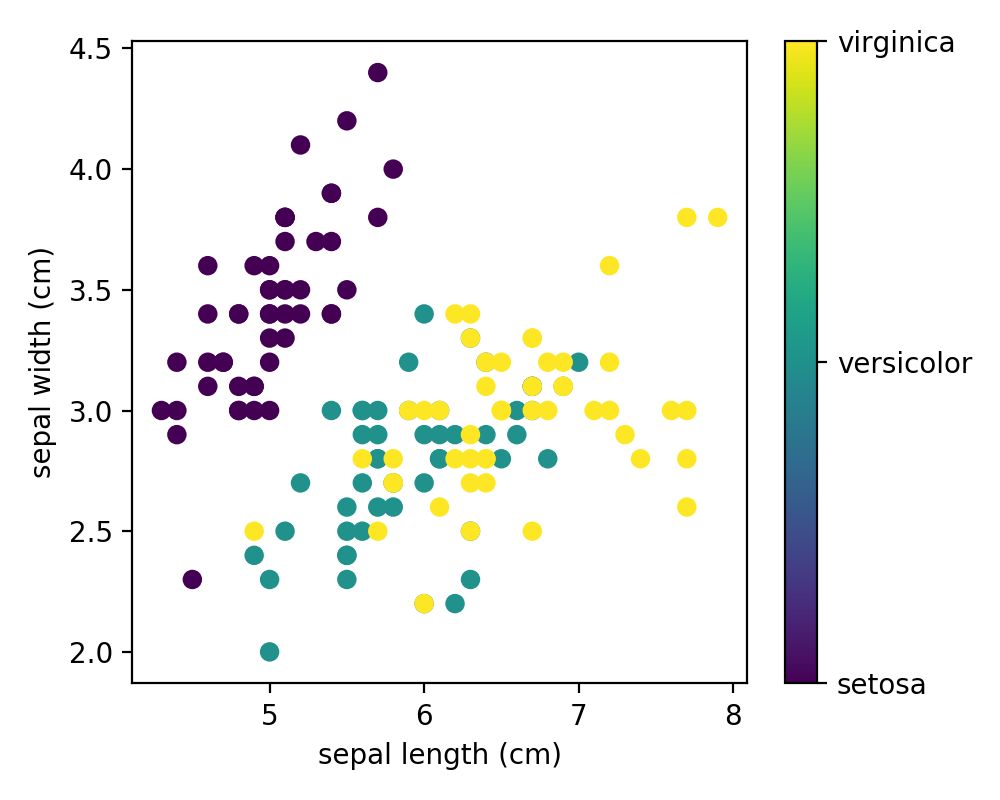

In [11]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()